In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import os
import math
from glob import glob
import pandas as pd
import cv2

In [2]:
def get_train_data(data_dir):
    img_path_list = []
    label_list = []
    # 이미지와 라벨 빈 리스트 생성
    for case_name in os.listdir(data_dir):
        current_path = os.path.join(data_dir, case_name)
        if os.path.isdir(current_path):
            # get image path
            img_path_list.extend(glob(os.path.join(current_path, 'image', '*.jpg')))
            img_path_list.extend(glob(os.path.join(current_path, 'image', '*.png')))
            
            # get label
            label_df = pd.read_csv(current_path+'/label.csv')
            label_list.extend(label_df['leaf_weight'])
                
    return img_path_list, label_list
    # 이미지데이터와 라벨 데이터 분리

def get_test_data(data_dir):
    # get image path
    img_path_list = glob(os.path.join(data_dir, 'image', '*.jpg'))
    img_path_list.extend(glob(os.path.join(data_dir, 'image', '*.png')))
    #img_path_list.sort(key=lambda x:(x.split('/')[-1].split('.')[0]))
    img_path_list.sort(key=lambda x:int(x.split('\\')[-1].split('.')[0])) 
    return img_path_list

In [3]:
all_img_path, all_label = get_train_data('./dataset/train')
test_img_path = get_test_data('./dataset/test')

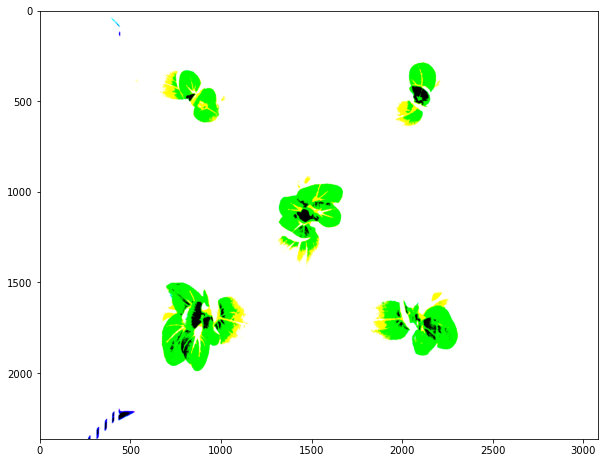

In [10]:
img = cv2.imread(all_img_path[146])
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cropped = image[50:-50, 100:-100]
ret, thresh1 = cv2.threshold(cropped,68,255,cv2.THRESH_BINARY)
plt.figure(figsize=(10, 10))
plt.imshow(thresh1)
plt.show()

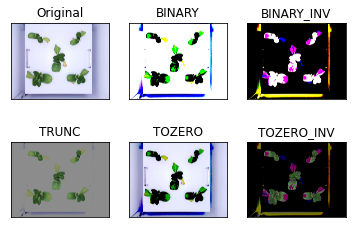

<Figure size 1728x432 with 0 Axes>

In [46]:
the = 140
ret, thresh1 = cv2.threshold(cropped,the,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(cropped,the,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(cropped,the,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(cropped,the,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(cropped,the,255, cv2.THRESH_TOZERO_INV)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [cropped,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
	plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
	plt.title(titles[i])
	plt.xticks([]),plt.yticks([])

plt.show()

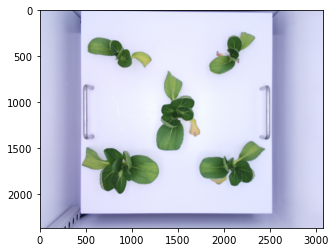

In [5]:
plt.imshow(cropped)
plt.show()

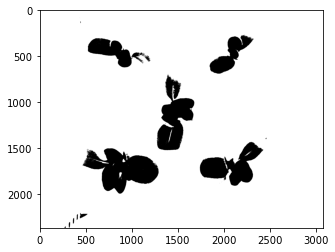

In [6]:
#ret, th_145 = cv2.threshold(cropped, 100, 255, cv2.THRESH_BINARY)
#색도 채도 휘도
#frame_threshold = cv2.inRange(cropped, (60, 78, 98), (137, 35, 65))
frame_threshold = cv2.inRange(cropped, (52, 55, 98), (255, 255, 255))
plt.imshow(frame_threshold,'gray')

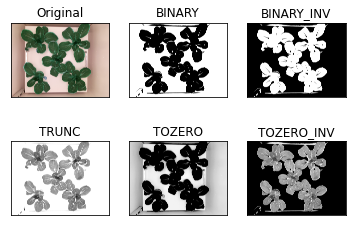

In [7]:
img = cv2.imread(all_img_path[10],cv2.COLOR_BGR2RGB)
src = cv2.imread(all_img_path[10], cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

ret, thresh1 = cv2.threshold(v,127,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(v,127,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(v,127,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(v,127,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(v,127,255, cv2.THRESH_TOZERO_INV)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
	plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
	plt.title(titles[i])
	plt.xticks([]),plt.yticks([])

plt.show()

In [8]:
img.shape

(2464, 3280, 3)

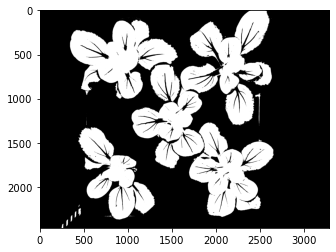

In [9]:
src = cv2.imread(all_img_path[10], cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
ret, threshv = cv2.threshold(v,100,255, cv2.THRESH_BINARY_INV)
plt.imshow(threshv,'gray')

In [10]:
threshv.shape

(2464, 3280)

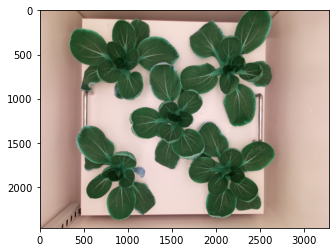

In [11]:
plt.imshow(src,'gray')

In [12]:
ret, threshh = cv2.threshold(h,0,255, cv2.THRESH_BINARY)
ret, threshs = cv2.threshold(s,0,255, cv2.THRESH_BINARY)

In [13]:
New_b = np.empty

In [14]:
New_b = np.stack((threshh,threshs,threshv), axis=2)

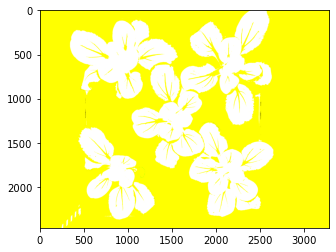

In [15]:
plt.imshow(New_b,'gray')

In [16]:
ret, threshss = cv2.threshold(New_b,127,255, cv2.THRESH_BINARY)

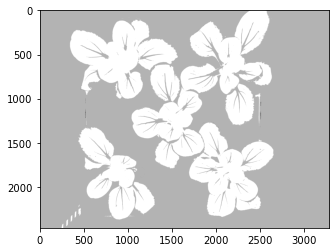

In [17]:
New_gray = cv2.cvtColor(New_b, cv2.COLOR_BGR2GRAY)
plt.imshow(New_gray,'gray')

In [18]:
threshss.shape

(2464, 3280, 3)

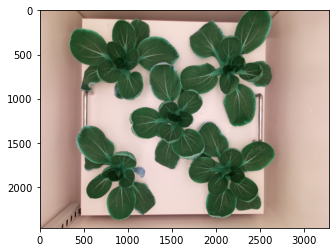

In [19]:
plt.imshow(src,'gray')

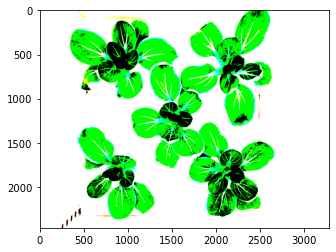

In [20]:
ret, threshv = cv2.threshold(src, 68,255, cv2.THRESH_BINARY)
plt.imshow(threshv,'gray')

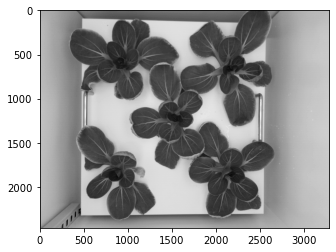

In [21]:
gra_i = cv2.imread(all_img_path[10], cv2.IMREAD_GRAYSCALE)
#img = cv2.imread(src, cv2.IMREAD_GRAYSCALE) 
plt.imshow(gra_i,'gray')

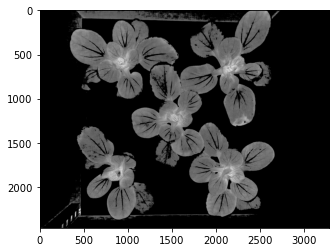

In [22]:
ret, threshg = cv2.threshold(s, 85 ,255, cv2.THRESH_TOZERO)
plt.imshow(threshg ,'gray')

In [23]:
ret, thresh1 = cv2.threshold(v,127,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(v,127,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(v,127,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(v,127,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(v,127,255, cv2.THRESH_TOZERO_INV)

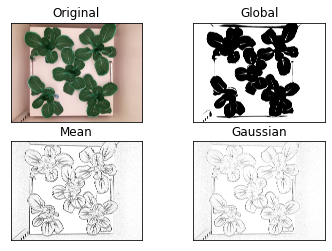

In [24]:
ret, th1 = cv2.threshold(v,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(v,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,5)
th3 = cv2.adaptiveThreshold(v,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,5)

titles = ['Original','Global','Mean','Gaussian']
images = [img,th1,th2,th3]

for i in range(4):
	plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
	plt.title(titles[i])
	plt.xticks([]),plt.yticks([])

plt.show()